In [1]:
import os
import cv2
import random
import numpy as np
from collections import Counter
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt

In [215]:
a_name = 'DTL-ADC'
a_accuracy = 0.6774
a_auc = 0.465
a_sensitivity = 0.5625
a_specificity = 0.3695
a_fpr = [0.0,0.022,0.022,0.065,0.065,0.174,0.174,0.37,0.37,0.457,0.457,0.587,0.587,0.609,0.609,0.63,0.63,0.717,0.717,0.739,0.739,0.804,0.804,0.87,0.87,0.957,0.957,1.0]
a_tpr = [0.16,0.16,0.222,0.222,0.285,0.285,0.41,0.41,0.472,0.472,0.535,0.535,0.66,0.66,0.722,0.722,0.785,0.785,0.848,0.848,0.91,0.91,1.035,1.035,1.098,1.098,1.16,1.16]
a_precision = [0.651,0.638,0.624,0.628,0.632,0.636,0.622,0.626,0.63,0.634,0.639,0.623,0.627,0.61,0.592,0.573,0.577,0.581,0.585,0.589,0.594,0.599,0.577,0.581,0.586,0.592,0.598,0.571,0.577,0.582,0.589,0.595,0.602,0.61,0.577,0.584,0.592,0.6,0.56,0.568,0.577,0.586,0.598,0.543,0.553,0.564,0.493,0.501,0.51,0.521,0.535,0.41,0.41,0.41,0.41,0.41,0.41,0.41,1.41]
a_recall = [1.08,1.009,0.937,0.937,0.937,0.937,0.866,0.866,0.866,0.866,0.866,0.794,0.794,0.723,0.651,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.509,0.509,0.509,0.509,0.509,0.437,0.437,0.437,0.437,0.437,0.437,0.437,0.366,0.366,0.366,0.366,0.294,0.294,0.294,0.294,0.294,0.223,0.223,0.223,0.151,0.151,0.151,0.151,0.151,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08]

b_name = 'DTL-T2'
b_accuracy = 0.6129
b_auc = 0.4077
b_sensitivity = 0.2857
b_specificity = 0.6458
b_fpr = [0.0,0.021,0.146,0.146,0.229,0.229,0.271,0.271,0.354,0.354,0.417,0.417,0.542,0.542,0.625,0.625,0.75,0.75,0.771,0.771,0.854,0.854,0.917,0.917,1.0]
b_tpr = [0.1,0.1,0.1,0.171,0.171,0.243,0.243,0.314,0.314,0.386,0.386,0.457,0.457,0.529,0.529,0.6,0.6,0.814,0.814,0.886,0.886,0.957,0.957,1.1,1.1]
b_precision = [0.577,0.564,0.569,0.573,0.578,0.583,0.569,0.574,0.579,0.585,0.57,0.555,0.56,0.565,0.571,0.554,0.56,0.543,0.548,0.554,0.56,0.566,0.547,0.553,0.532,0.539,0.516,0.492,0.498,0.504,0.51,0.517,0.524,0.532,0.502,0.51,0.518,0.527,0.537,0.5,0.51,0.521,0.532,0.545,0.56,0.577,0.596,0.618,0.643,0.583,0.51,0.532,0.56,0.596,0.643,0.71,0.56,0.643,0.81,0.31,1.31]
b_recall = [1.0,0.938,0.938,0.938,0.938,0.938,0.875,0.875,0.875,0.875,0.812,0.75,0.75,0.75,0.75,0.688,0.688,0.625,0.625,0.625,0.625,0.625,0.562,0.562,0.5,0.5,0.438,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.312,0.312,0.312,0.312,0.312,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.188,0.125,0.125,0.125,0.125,0.125,0.125,0.062,0.062,0.062,0.0,0.0]

c_name = 'DTL-T2+ADC'
c_accuracy = 0.629
c_auc = 0.543
c_sensitivity = 0.25
c_specificity = 0.696
c_fpr = [0.1,0.1,0.122,0.122,0.404,0.404,0.448,0.448,0.535,0.535,0.557,0.557,0.578,0.578,0.622,0.622,0.643,0.643,0.687,0.687,0.796,0.796,0.861,0.861,1.057,1.057,1.1]
c_tpr = [0.0,0.15,0.15,0.288,0.288,0.35,0.35,0.412,0.412,0.475,0.475,0.538,0.538,0.6,0.6,0.662,0.662,0.725,0.725,0.912,0.912,0.975,0.975,1.038,1.038,1.1,1.1]
c_precision = [0.497,0.484,0.489,0.493,0.498,0.503,0.508,0.513,0.518,0.524,0.53,0.516,0.522,0.528,0.534,0.519,0.525,0.532,0.54,0.547,0.555,0.538,0.519,0.5,0.508,0.516,0.495,0.503,0.48,0.488,0.497,0.471,0.48,0.452,0.461,0.43,0.438,0.447,0.457,0.468,0.43,0.441,0.452,0.406,0.418,0.43,0.444,0.461,0.48,0.503,0.53,0.563,0.605,0.659,0.73,0.83,0.98,0.897,0.73,1.23,1.23]
c_recall = [1.0,0.938,0.938,0.938,0.938,0.938,0.938,0.938,0.938,0.938,0.938,0.875,0.875,0.875,0.875,0.812,0.812,0.812,0.812,0.812,0.812,0.75,0.688,0.625,0.625,0.625,0.562,0.562,0.5,0.5,0.5,0.438,0.438,0.375,0.375,0.312,0.312,0.312,0.312,0.312,0.25,0.25,0.25,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.188,0.125,0.062,0.062,0.0]

d_name = 'DL'
d_accuracy = 0.532
d_auc = 0.387
d_sensitivity = 0.8
d_specificity = 0.127
d_fpr = [0.0,0.021,0.128,0.128,0.17,0.17,0.319,0.319,0.362,0.362,0.447,0.447,0.532,0.532,0.553,0.553,0.596,0.596,0.787,0.787,0.83,0.83,0.851,0.851,0.872,0.872,0.894,0.894,0.957,0.957,1.0]
d_tpr = [0.2,0.2,0.2,0.267,0.267,0.333,0.333,0.4,0.4,0.467,0.467,0.533,0.533,0.6,0.6,0.667,0.667,0.733,0.733,0.8,0.8,0.867,0.867,0.933,0.933,1.0,1.0,1.133,1.133,1.2,1.2]
d_precision = [0.64,0.627,0.631,0.636,0.64,0.626,0.612,0.616,0.602,0.606,0.59,0.594,0.578,0.581,0.586,0.568,0.572,0.576,0.58,0.585,0.59,0.595,0.601,0.606,0.612,0.59,0.596,0.602,0.578,0.584,0.557,0.562,0.569,0.575,0.582,0.55,0.557,0.564,0.572,0.58,0.54,0.548,0.557,0.508,0.515,0.523,0.533,0.544,0.557,0.572,0.59,0.501,0.515,0.533,0.39,0.39,0.39,0.39,0.39,0.39,1.39]
d_recall = [1.0,0.983,0.983,0.983,0.983,0.917,0.85,0.85,0.783,0.783,0.717,0.717,0.65,0.65,0.65,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.517,0.517,0.517,0.45,0.45,0.383,0.383,0.383,0.383,0.383,0.317,0.317,0.317,0.317,0.317,0.25,0.25,0.25,0.183,0.183,0.183,0.183,0.183,0.183,0.183,0.183,0.117,0.117,0.117,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

e_name = 'DTL'
e_accuracy = 0.6129
e_auc = 0.5777
e_sensitivity = 0.615
e_specificity = 0.592
e_fpr = [0.05,0.05,0.05,0.061,0.061,0.143,0.143,0.163,0.163,0.204,0.204,0.327,0.327,0.408,0.408,0.673,0.673,0.735,0.735,0.776,0.776,0.837,0.837,1.0]
e_tpr = [0.0,0.0,0.177,0.177,0.254,0.254,0.331,0.331,0.408,0.408,0.485,0.485,0.562,0.562,0.7150000000000001,0.7150000000000001,0.792,0.792,0.9460000000000001,0.9460000000000001,1.0230000000000001,1.0230000000000001,1.1,1.1]
e_precision = [0.631,0.616,0.621,0.625,0.63,0.614,0.619,0.624,0.607,0.59,0.595,0.599,0.604,0.585,0.59,0.595,0.601,0.606,0.612,0.619,0.625,0.632,0.64,0.648,0.657,0.666,0.676,0.649,0.621,0.63,0.64,0.651,0.663,0.628,0.64,0.653,0.668,0.684,0.702,0.723,0.676,0.698,0.723,0.663,0.69,0.612,0.64,0.676,0.723,0.79,0.64,0.723,0.89,0.39,1.39]
e_recall = [1.05,0.973,0.973,0.973,0.973,0.896,0.896,0.896,0.819,0.742,0.742,0.742,0.742,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.665,0.588,0.512,0.512,0.512,0.512,0.512,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.358,0.358,0.358,0.281,0.281,0.204,0.204,0.204,0.204,0.204,0.127,0.127,0.127,0.05,0.05]

print(','.join(str(np.round(x+0.05,3)) for x in b_recall))



1.05,0.988,0.988,0.988,0.988,0.988,0.925,0.925,0.925,0.925,0.862,0.8,0.8,0.8,0.8,0.738,0.738,0.675,0.675,0.675,0.675,0.675,0.612,0.612,0.55,0.55,0.488,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.362,0.362,0.362,0.362,0.362,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.238,0.175,0.175,0.175,0.175,0.175,0.175,0.112,0.112,0.112,0.05,0.05


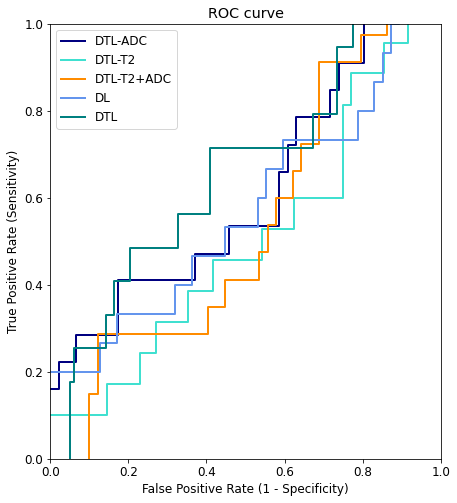

In [216]:
plt.figure(figsize=(7, 8))
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']
plt.plot(a_fpr, a_tpr, lw=2, color=colors[0], label=a_name)
plt.plot(b_fpr, b_tpr, lw=2, color=colors[1], label=b_name)
plt.plot(c_fpr, c_tpr, lw=2, color=colors[2], label=c_name)
plt.plot(d_fpr, d_tpr, lw=2, color=colors[3], label=d_name)
plt.plot(e_fpr, e_tpr, lw=2, color=colors[4], label=e_name)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()

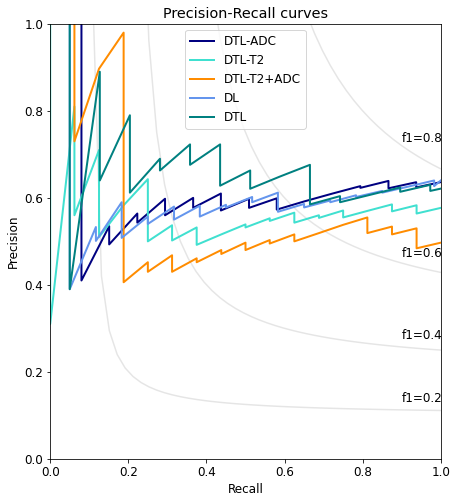

In [217]:
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

plt.plot(a_recall, a_precision, lw=2, color=colors[0], label=a_name)
plt.plot(b_recall, b_precision, lw=2, color=colors[1], label=b_name)
plt.plot(c_recall, c_precision, lw=2, color=colors[2], label=c_name)
plt.plot(d_recall, d_precision, lw=2, color=colors[3], label=d_name)
plt.plot(e_recall, e_precision, lw=2, color=colors[4], label=e_name)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend()

plt.show()
